# 6.2 Exploring relationships

This script contains the following:

1. Importing Libraries and Data
2. Correlations
3. Scatter Plots
4. Pair Plots
5. Categorical Plots







# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Checking matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
#Ensuring correct display of charts
%matplotlib inline

In [4]:
#Define path
path = r'C:\Users\Owner\OneDrive\Desktop\Data Analytics\Achievement 6'

In [5]:
#Import Data
df_housing = pd.read_csv(os.path.join(path, 'housing.csv'), index_col = False)

In [6]:
df_housing.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15870,2402100895,6/25/2014,640000,3,1.75,1620,6000,1.0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
1,8757,1773100755,8/21/2014,520000,11,3.00,3000,4960,2.0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
2,13314,627300145,8/14/2014,1148000,10,5.25,4590,10920,1.0,0,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
3,15161,5566100170,10/29/2014,650000,10,2.00,3610,11914,2.0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
4,19254,8812401450,12/29/2014,660000,10,3.00,2920,3745,2.0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


# 2. Correlations

In [7]:
#Create a subgroup
sub = df_housing[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'yr_built']]

In [8]:
sub

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
0,640000,3,1.75,1620,6000,1.0,1947
1,520000,11,3.00,3000,4960,2.0,1918
2,1148000,10,5.25,4590,10920,1.0,2008
3,650000,10,2.00,3610,11914,2.0,1958
4,660000,10,3.00,2920,3745,2.0,1913
...,...,...,...,...,...,...,...
21608,235000,0,0.00,1470,4800,2.0,1996
21609,320000,0,2.50,1490,7111,2.0,1999
21610,139950,0,0.00,844,4269,1.0,1913
21611,265000,0,0.75,384,213444,1.0,2003


In [9]:
# Create a correlation matrix using pandas
sub.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
price,1.000000,0.315438,0.525138,0.702035,0.089661,0.256794,0.054012
bedrooms,0.315438,1.000000,0.529163,0.591471,0.032811,0.181098,0.159180
bathrooms,0.525138,0.529163,1.000000,0.754665,0.087740,0.500653,0.506019
sqft_living,0.702035,0.591471,0.754665,1.000000,0.172826,0.353949,0.318049
sqft_lot,0.089661,0.032811,0.087740,0.172826,1.000000,-0.005201,0.053080
floors,0.256794,0.181098,0.500653,0.353949,-0.005201,1.000000,0.489319
yr_built,0.054012,0.159180,0.506019,0.318049,0.053080,0.489319,1.000000


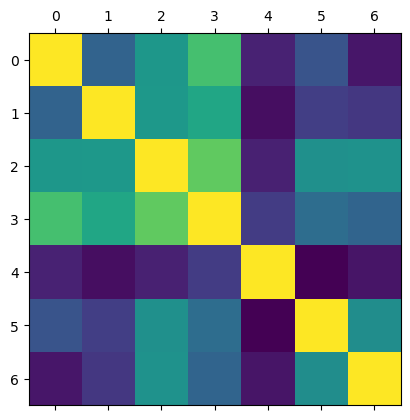

In [10]:
# Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

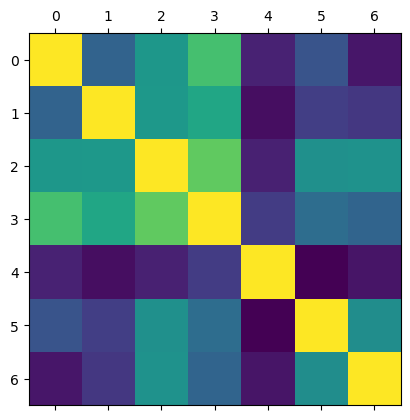

In [11]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("out.png")

In [12]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\Owner\\OneDrive\\Desktop\\Data Analytics\\Achievement 6'

Text(0.5, 1.0, 'Correlation Matrix')

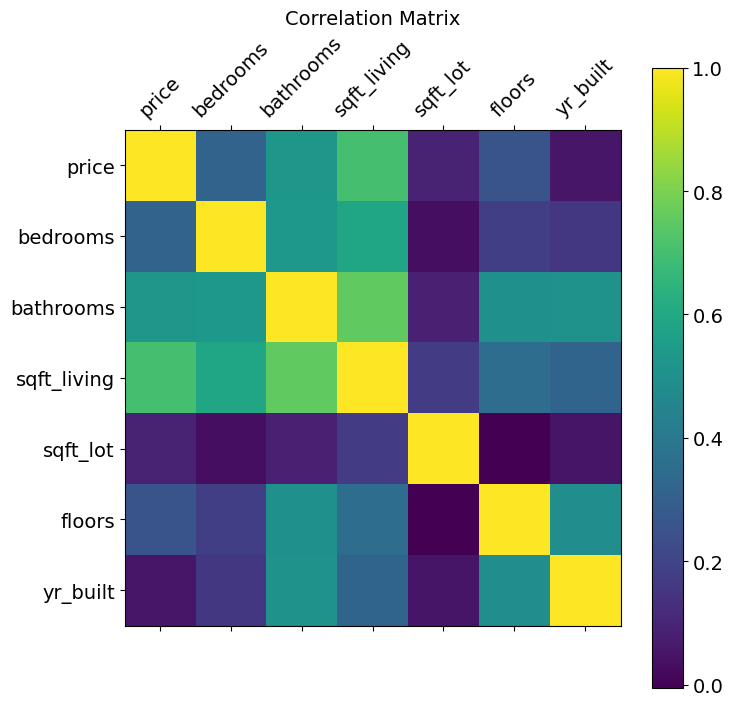

In [13]:
# Add labels, a legend, and change the size of the heatmap
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Create a correlation heatmap using seaborn

In [14]:
sub.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'yr_built'],
      dtype='object')

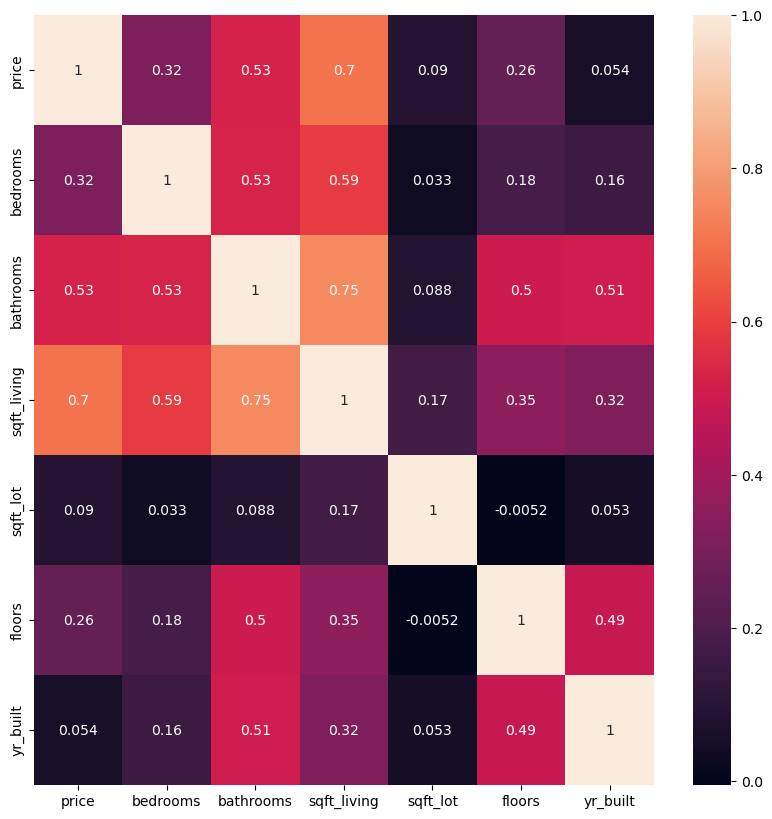

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In this heatmap you can see correlations between variables. When looking specifically at price, there is a strong correlation between year built, lot size, and living area.

# 3. Scatterplots

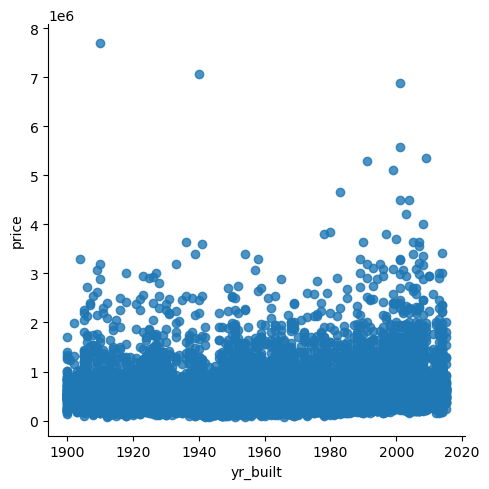

In [16]:
# Create a scatterplot for the "price" and "yr_built" columns

sns.lmplot(x = 'yr_built', y = 'price', data = sub)

This shows that there is not much impact on the year the house was built and the price of the house.

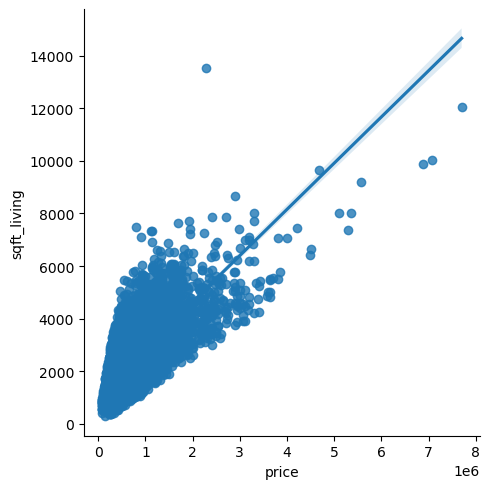

In [17]:
# Create a scatterplot for the "price" and "sqft_living" columns

sns.lmplot(x = 'price', y = 'sqft_living', data = sub)

There is a very strong relationship between price nad sq. ft of living, as expected. The more living area, the more expensive the house.

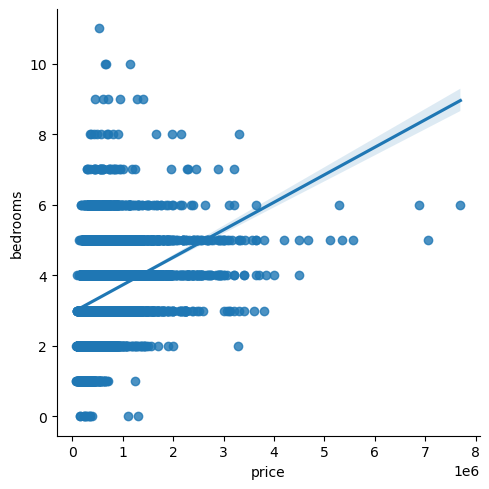

In [18]:
# Create a scatterplot for the "price" and "bedrooms" columns
sns.lmplot(x = 'price', y = 'bedrooms', data = sub)

There exists some relationship between number of bedrooms and price. There seems to be an outlier with one bedroom over 30, but the price is cheap. I will need to look into this.

# 4. Pair Plots

In [19]:
# Creating a pair plot of the sub dataset

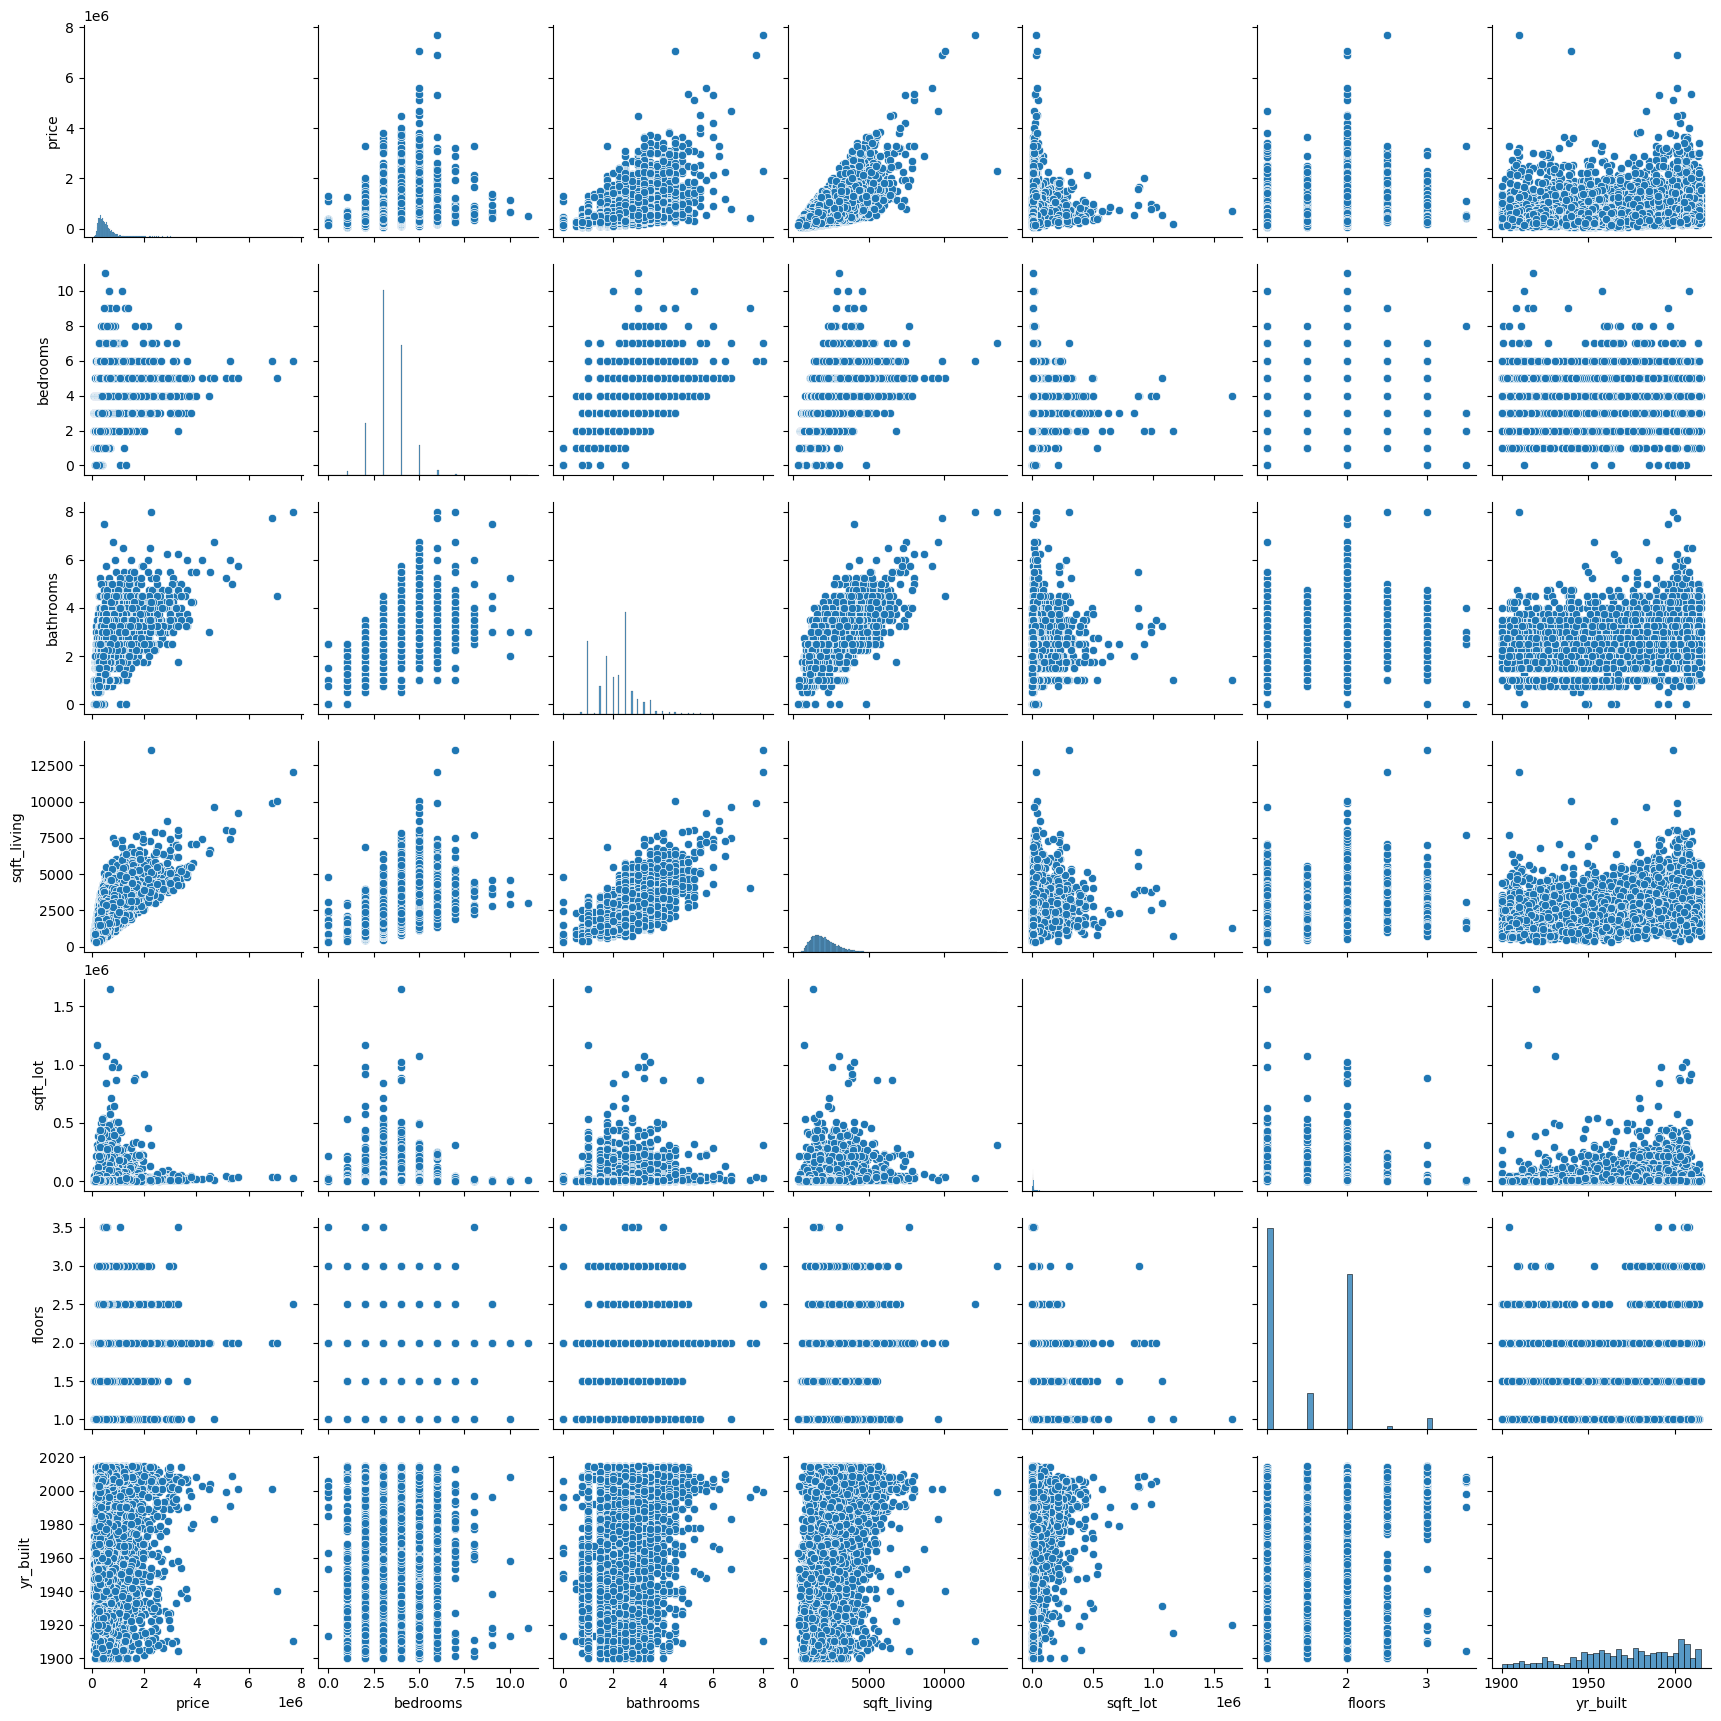

In [20]:
g = sns.pairplot(sub)

As I'm looking mostly about what constitutes a higher price of a home in Kansas City, I'd like to focus on variables which effect the price, such as living space and bedrooms. There are other variables which I will be investigating such as location, but for the sake of memory, I only conducted the analysis up to this point on these variables.

# 5. Categorical Plots

<AxesSubplot:xlabel='price', ylabel='Count'>

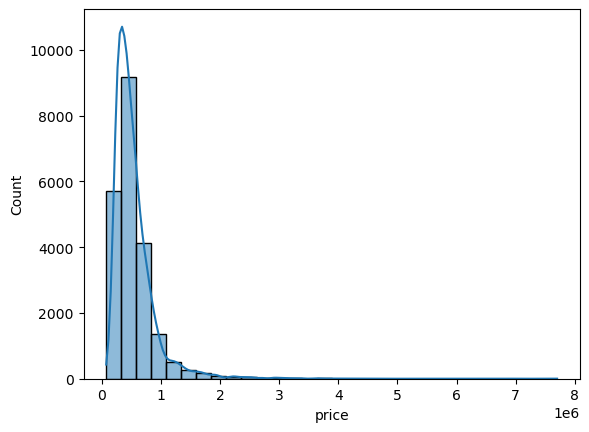

In [21]:
#Create histogram of 'price' category

sns.histplot(sub["price"], bins = 30, kde = True)

In [22]:
df_housing.loc[df_housing['price'] < 400000, 'Price category'] = 'low price'

In [23]:
df_housing.loc[(df_housing['price'] >= 400000) & (df_housing['price'] < 1000000), 'Price category'] = 'middle price'

In [24]:
df_housing.loc[df_housing['price'] >= 1000000, 'Price category'] = 'high price'

In [25]:
df_housing['Price category'].value_counts(dropna = False)

middle price    11427
low price        8694
high price       1492
Name: Price category, dtype: int64

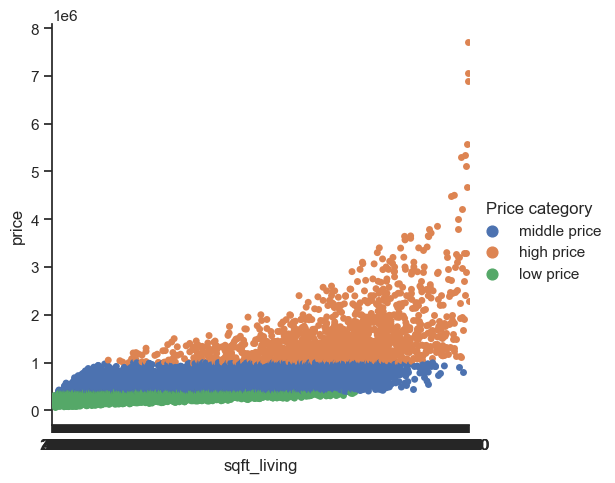

In [27]:
# Create a categorical plot

sns.set(style="ticks")
g = sns.catplot(x = "sqft_living", y="price", hue="Price category", data=df_housing)

Above is a categorical plot of the square feet of living vs. the price of the house/apartment. As expected, as the amount of living space increases, the price increases too. 

In [28]:
# fig = g.get_figure()
g.savefig("out.png") 

# Answers to Questions in Task 1

1. What factors contribute to higher-priced homes?

Some of the factors that contribute to higher priced homes include sqft. living area, bedrooms, and bathrooms.

2. What area of King County has the most expensively priced homes?

The area with the most expensively priced homes are the Seattle area.

# Hypotheses

1. If number of bedrooms increases, the price of the house increases.

2. If amount of square ft. living increases, the price of the house increases.